# CMSC 33750
## HW1
### 10/3/20
### Lynn Zheng

I used the following query on the GDC website to get the data:

```
cases.project.project_id in ["TCGA-HNSC"] and files.analysis.workflow_type in ["HTSeq - Counts"] and files.data_category in ["transcriptome profiling"] and files.experimental_strategy in ["RNA-Seq"]
```

For the purpose of this assignment, I simply noted down the UUID of the two first files to make a request to the GDC API. They are `a0449ff1-fdc5-44b0-8a9e-db35d1d8dabc` and `c5959596-de4f-4466-980d-d8973ca7e3da`.

I downloaded the two files by requesting `https://api.gdc.cancer.gov/files/<UUID>`. The two files are located in `../data/` and are named `418dd9f0-a87c-402e-8101-2c769e383cc5.htseq.counts` and `c1317d94-8e44-4426-9185-c0af48d12447.htseq.counts`

In [23]:
import pandas as pd

In [24]:
file = '../data/418dd9f0-a87c-402e-8101-2c769e383cc5.htseq.counts'
df = pd.read_csv(file, sep='\t', header=None, index_col=0,
                names=['gene', 'count'])
df.head()

,count
gene,
ENSG00000000003.13,1027
ENSG00000000005.5,0
ENSG00000000419.11,1649
ENSG00000000457.12,689
ENSG00000000460.15,494


In [25]:
df.describe()

,count
count,6.048800e+04
mean,1.463774e+03
std,9.315718e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,5.500000e+01
max,2.260572e+07


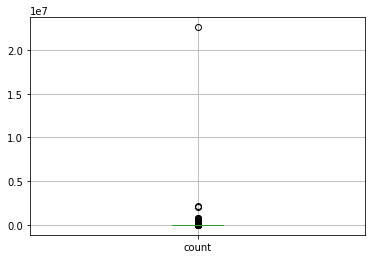

In [26]:
df.boxplot()

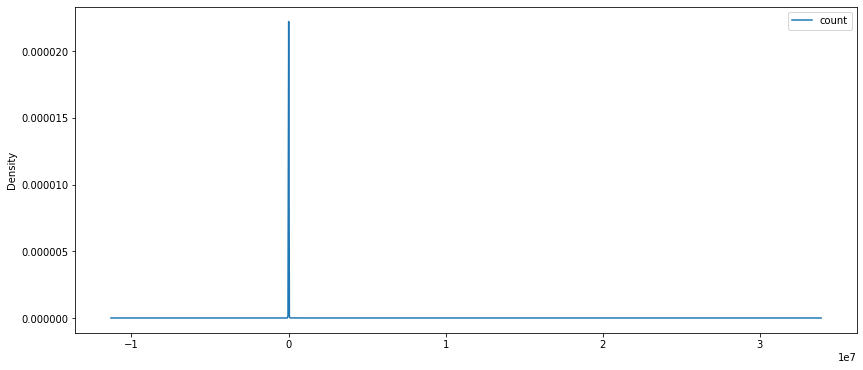

In [27]:
df.plot(kind='density', figsize=(14, 6))

In [28]:
df.loc[df['count'] >= df['count'].quantile(0.9999)]

,count
gene,
ENSG00000108821.12,685372
ENSG00000186081.10,740342
ENSG00000186847.5,649281
ENSG00000205420.9,738020
__no_feature,2011162
__ambiguous,2214616
__alignment_not_unique,22605715


From the output above, the list of genes that are above the 99.99% quantile are: `ENSG00000108821.12, ENSG00000186081.10, ENSG00000186847.5, ENSG00000205420.9`.

The data appears to be heavily right skewed, so we try removing the two outliers on the far right tail.

In [29]:
# remove __alignment_not_unique and __ambiguous
print(df.idxmax(), df.max())
df = df.drop(df.idxmax())
print(df.idxmax(), df.max())
df = df.drop(df.idxmax())
df.describe()

count    __alignment_not_unique
dtype: object count    22605715
dtype: int64
count    __ambiguous
dtype: object count    2214616
dtype: int64


,count
count,6.048600e+04
mean,1.053474e+03
std,1.223990e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,5.500000e+01
max,2.011162e+06


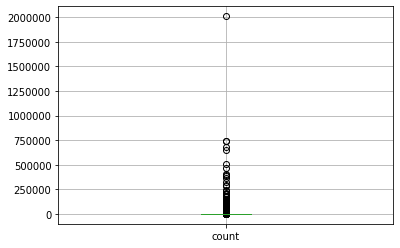

In [30]:
df.boxplot()

As the data still looks right-skewed, we remove another outlier.

In [31]:
# remove __no_feature
print(df.idxmax(), df.max())
df = df.drop(df.idxmax())

count    __no_feature
dtype: object count    2011162
dtype: int64


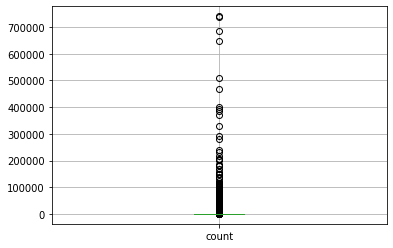

In [32]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ccdcac0>]],
      dtype=object)

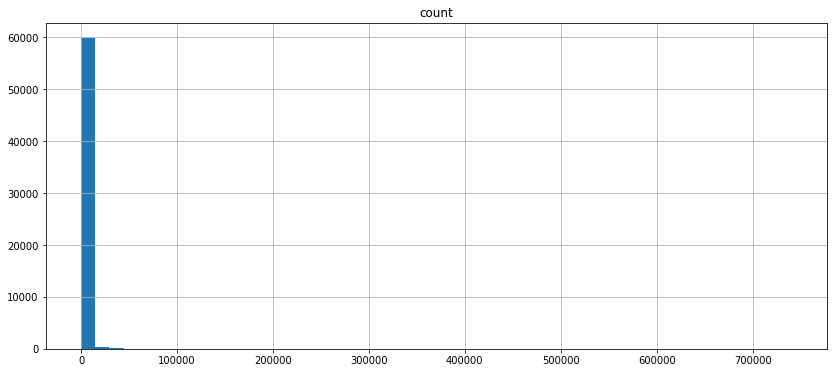

In [33]:
df.hist(bins=50, figsize=(14, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc70d90>]],
      dtype=object)

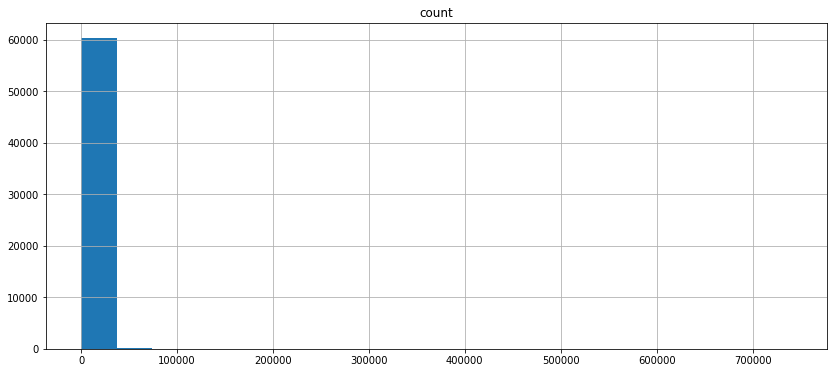

In [34]:
df.hist(bins=20, figsize=(14, 6))

We plot specific upper quantiles to visualize the distribution on the lower tail of the data

In [35]:
def plot_quantiles(df, quantiles):
    for upper in quantiles:
        df.plot(kind='hist',
                range=[0, df['count'].quantile(upper)],
                title='Quantile: (0, {})'.format(upper),
               figsize=(14, 6))

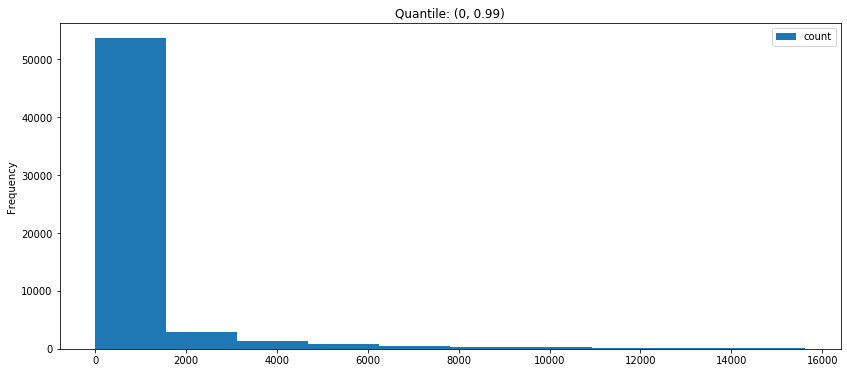

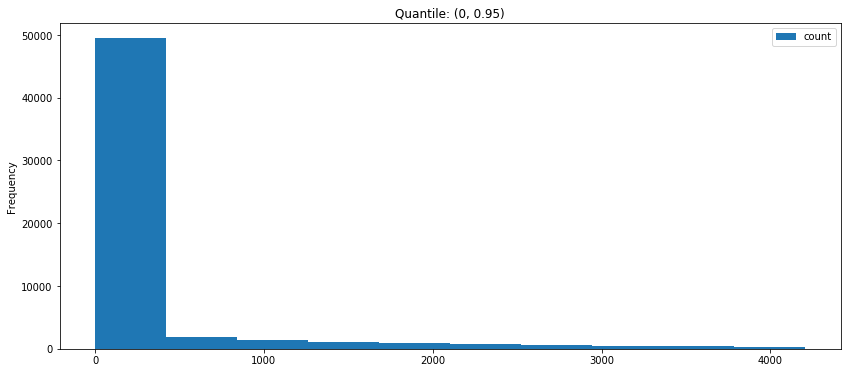

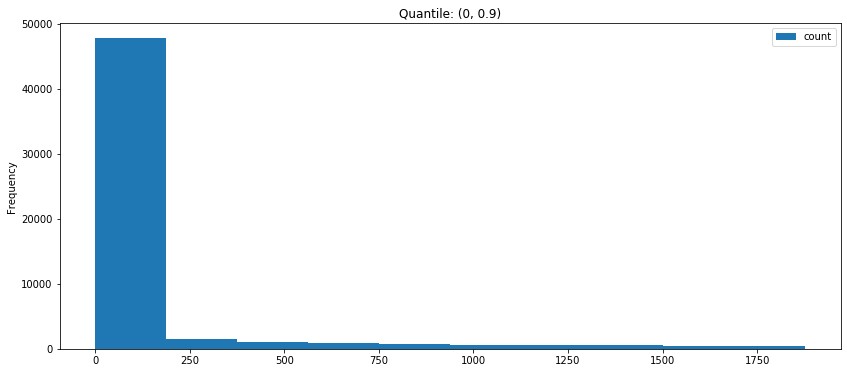

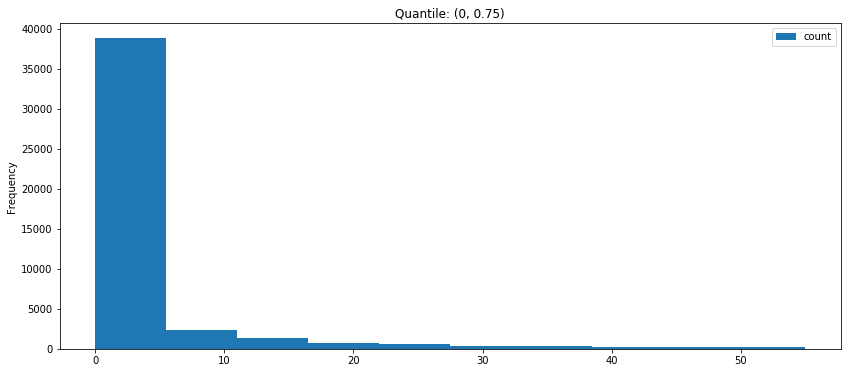

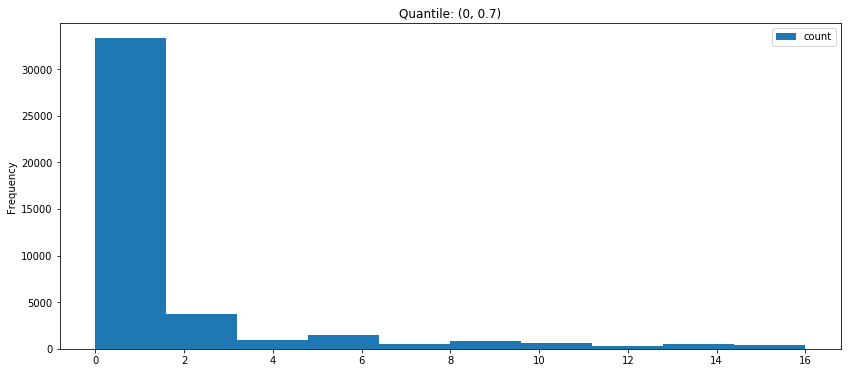

In [36]:
plot_quantiles(df, [0.99, 0.95, 0.9, 0.75, 0.7])

In conclusion, we found that the HTSeq counts data is highly right-skewed, meaning that the majority of genes have very small counts while a few have large counts.

We repeat a briefer version of the above analysis on the other data file.

In [37]:
file = '../data/c1317d94-8e44-4426-9185-c0af48d12447.htseq.counts'
df2 = pd.read_csv(file, sep='\t', header=None, index_col=0,
                names=['gene', 'count'])
df2.describe()

,count
count,6.048800e+04
mean,1.211295e+03
std,8.908374e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.100000e+01
max,2.160290e+07


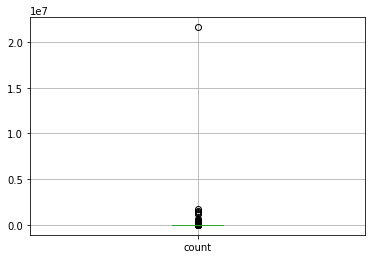

In [38]:
df2.boxplot()

In [39]:
df2.loc[df2['count'] >= df2['count'].quantile(0.9999)]

,count
gene,
ENSG00000171401.13,661868
ENSG00000186081.10,1446501
ENSG00000186847.5,1471624
ENSG00000205420.9,1171218
__no_feature,1252391
__ambiguous,1686311
__alignment_not_unique,21602903


From the output above, the list of genes that are above the 99.99% quantile are: `ENSG00000108821.12, ENSG00000186081.10, ENSG00000186847.5, ENSG00000205420.9`.

Note that in both samples (data files), the three genes `ENSG00000186081.10, ENSG00000186847.5, ENSG00000205420.9` have counts taht are above the 99.99% quantile. These genes might be of interest to us when we perform the clustering.

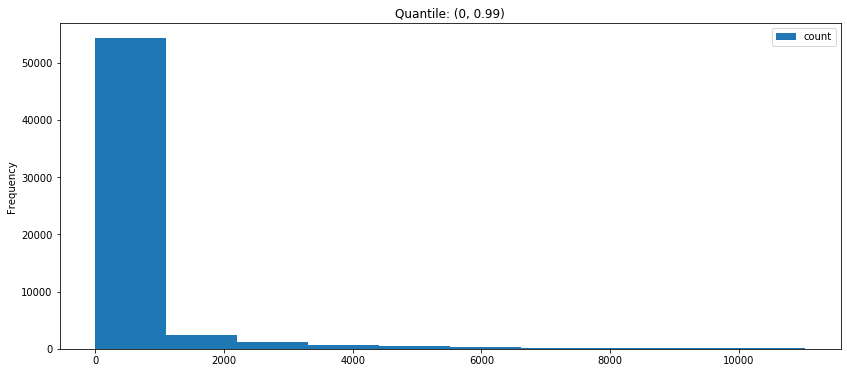

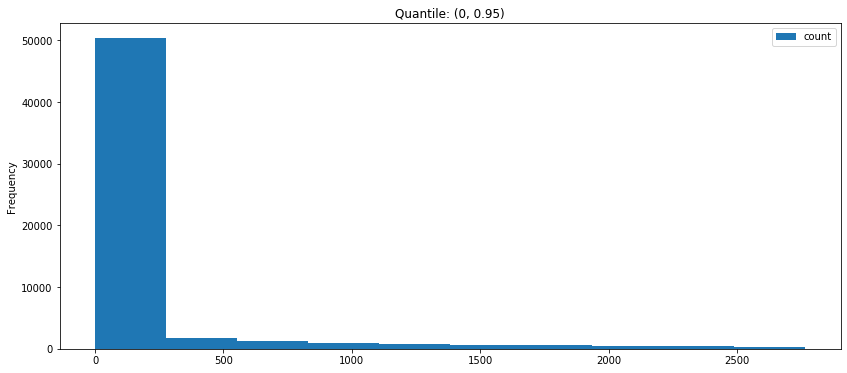

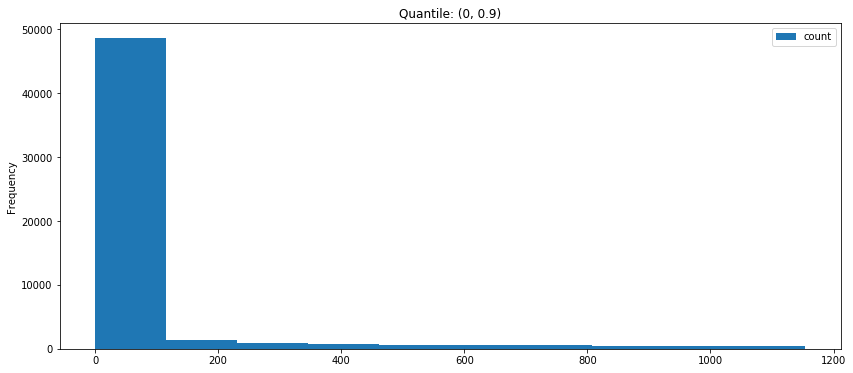

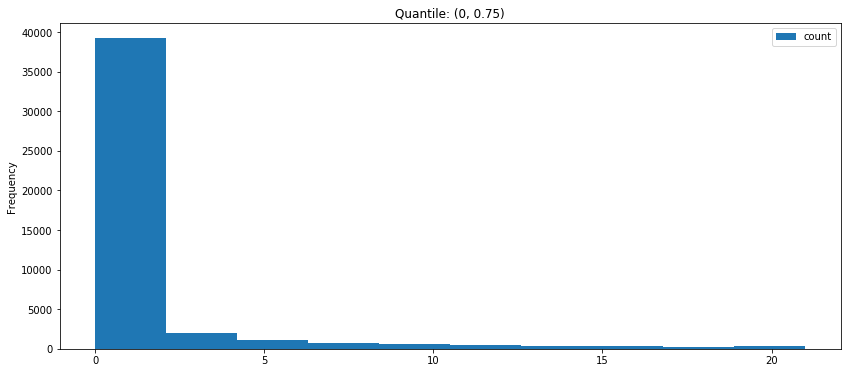

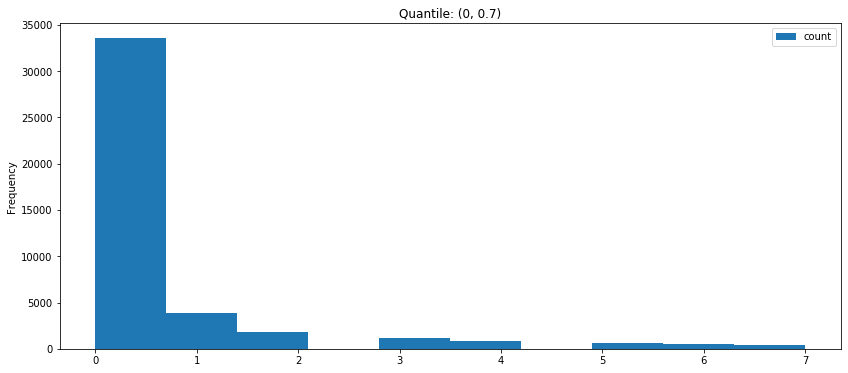

In [40]:
plot_quantiles(df2, [0.99, 0.95, 0.9, 0.75, 0.7])